Ссылка на презентацию по проекту: https://drive.google.com/file/d/1QrGOBrCtUr3Mdd7Mlt7LqRL5Oe8Ixegi/view?usp=sharing

# Анализ причин оттока клиентов банка "Метанпром" в Ярославской области

__Описание проекта:__

Региональный банк испытывает проблему с оттоком клиентов. Нам нужно понять причины оттока. Разбить клиентов банка на группы(или сегменты) и понять какие группы наиболее склонны к "оттоку". Результатом нашего анализа целевых групп может стать набор рекомендаций для снижения оттока/удержания клиентов.

__Цель проекта:__

Снизить колличество клиентов, которые уходят в "отток".

__Заказчик проекта:__

Отдел маркетинга банка.

__Конечный результат:__

Рекомендации, полученные в результате анализа, которые помогут снизить отток и, возможно, вернуть ушедших клиентов. Рекомендации будут представлены в виде пдф-презентации.

__План работ__

В ходе анализа нами будут выполнены следующие задачи, которые можно разбить на соответсвующие этапы.

1) Этап предобработки данных:

- загрузка необходимых библиотек;

- загрузка датафрейма с информацией о клиентах банка;

- приведение данных к нужным типам;

- проверка данных на дубликаты;

- проверка данных на пропуски. Попуски могут быть связанны как с техническим сбоем при заполнении, так и со спецификой данных. Мы проверим, есть ли какая-то зависимость между пропусками в столбце "баланс" и наличием банковских продуктов, владением кредитной картой, последней активностью и собственностью клиента; 

- перекодируем данные в столбцах с указаниям пола и города жителсьтва клиента. 

2) Этап анализа данных:

- посмотрим на средния значения различных характеристик в группах с оттоком и без него;

- построим гистограммы для оценки распределения различных характеристик клиентов;

- построим корреляционную матрицу и определим, какие признаки влияют на отток. Визуализируем матрицу хитмепом;

- визуализируем данные из датафрейма, чтобы выявить зависимости между различными признаками и целевым показателем. Построим графики displot для каждого признака с разбиением по оттоку. Построим парный графики для показателей зарплаты и возраста/количества продуктов;

- опишем портрет отточного клиента. Полученные на этом этапе результаты лягут в основу сегментезации клиентов.

3) Этап проверки гипотез:

- проверим двустороннюю гипотезу о различиях в доходах ушедших и оставшихся клиентов;

- проверим двухстороннюю гипотезу о различиях в количестве используемых баноквских продуктов ушедших и оставшихся клиентов.

Для проверки гипотез будет использован t-test Стьюдента, т.к. обе выборки (клиенты оттока и лоялисты) количесвтенные; обе выборки независимые (не связанные между собой, т.к. ушедшие и оставшиеся клиенты - это разные люди). 
Уровень статистическо значимсоти будет задан как 0.01, т.к. количество наблюдений в наших выборках колеблется от нескольких сотен до нескольких тысяч.

4) Этап сегментизации клиентов:

- Разобьём клиентов на сегменты, чтобы определить отточность.

5) Выводы и рекомендации. 

- После определния проблемных и успешных сегментов, будет составлена карта мероприятий для удержания клиентов. 

6) Создание презентации с результатами исследования.

##  1. Предобработка данных

Загрузим необходимые библиотеки 

In [1]:
import warnings
warnings.simplefilter('ignore') # Отключили варнинги - они меня пугают...

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np
#import math
from sklearn.tree import DecisionTreeClassifier # Для построения Дерева решений
from sklearn import tree # Для визуализации Дерева решений
import statistics
from statsmodels. stats.weightstats import ztest as ztest

Загрузим датасет, с которым будем работать

In [2]:
path = "https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F"
data = pd.read_csv(path)

Посмотрим на данные

In [3]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            10000 non-null  int64  
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 937.6+ KB


,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00000,10000.000000,10000.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,171814.71260,848.409400,42.837100,2.627600,8.277943e+05,1.874100,0.680400,0.523500,1.478669e+05,0.182200
std,33708.23812,65.796312,12.128507,1.980836,1.980614e+06,0.799946,0.466345,0.499472,1.393885e+05,0.386029
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,801.000000,34.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


Видим, что в столбце "продукты" есть значения равные "0", что странно - клиент банка должен иметь хотя бы один продукт.

In [4]:
data[data['products'] == 0]

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
8957,147837,962.0,Рыбинск,Ж,79,3,NaN,0,0,0,25063.96,1


Из 10.000 клиентов только у одного 0 испольхуемых продуктов, но это клиент оттока. Возможно, это человек, который закрыл все продукты, или подал заявления на завершения обслуживания, или, в силу возраста, по естественным причинам не может быть клиентом банка. Думаю, что можем её удалить из датасета.

In [3]:
data = data.loc[data['products'] != 0]

In [6]:
data.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34,5,174.00,1,1,0,67353.16,1


Видим, что: 

1) Названия столбцоа "пляшут". Для эстетики переведём их в "змеиный" регистр. 

2) В столбце "balance" есть пропуски. Поработаем с ними.

3) Перекодируем значения в столбцах с полом и городом проживания.

Приведём данные к нижнему регистру.

In [4]:
data.columns = data.columns.str.lower()

Сделаем срез по клиентам, у которых баланс неизвестен и опишем эти данные.

In [8]:
equity = data[data['balance'].isna()]
equity.describe()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,2294.000000,2294.000000,2294.000000,2294.000000,0.0,2294.000000,2294.000000,2294.000000,2.294000e+03,2294.000000
mean,172080.011334,864.045772,41.833043,0.049695,NaN,1.162598,0.816042,0.549695,2.263979e+05,0.005231
std,33340.511155,90.928381,11.714459,0.217361,NaN,0.401888,0.387535,0.497633,1.997711e+05,0.072152
min,114182.000000,642.000000,18.000000,0.000000,NaN,1.000000,0.000000,0.000000,2.027403e+04,0.000000
25%,143091.750000,870.250000,33.000000,0.000000,NaN,1.000000,1.000000,0.000000,1.204182e+05,0.000000
50%,172713.500000,902.500000,39.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.742028e+05,0.000000
75%,201554.000000,922.000000,49.000000,0.000000,NaN,1.000000,1.000000,1.000000,2.400706e+05,0.000000
max,229145.000000,990.000000,86.000000,1.000000,NaN,3.000000,1.000000,1.000000,1.333687e+06,1.000000


Видим, что таких клиентов довольно много - 2295 человек (почти 23%) от всей выборки. 
Самые сильные различия с описанием общей выборки здесь, во-первых, в низком уровнем оттока - 0,5%. Во-вторых, в количестве собственности, т.к. в среднем по выборке это показателем равен 2,6, а здесь всего 0,05. Т.е., это клиенты у которых нет значимой сосбственности. 

In [9]:
display(data[data['balance'] == 0])

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3900,179831,730.0,Ярославль,М,18,0,0.0,2,1,1,64548.33,0
6757,148456,813.0,Ярославль,М,20,2,0.0,2,1,0,23876.51,0


А количество клиентов, у которых на балансе "0" - всего 2 человека из 10000. При этом, у одного из них количесвто значимой собственности также равно "0".

Думаю, что здесь имеет место либо какая-то банковская особенность связи собственности и баланса, либо технический сбой, когда у клиентов с нулевой сосбственностью на балансе тоже оказался "0".

Теоретически у нас есть три варианта.

Во-первых, удалить эти данные. Этот вариант отметаем, т.к. мы лишимся 23% выборки, что очень сильно исказит конечные результаты нашего исследования.

Во-вторых, заполнить пропущенные значения средним значением по столбцу, которое у нас есть. 

В-третьих, заполнить пропущенные значения нулём. 

Построим графики собственности и количества исаользуемых продуктов в разрезе баланса.

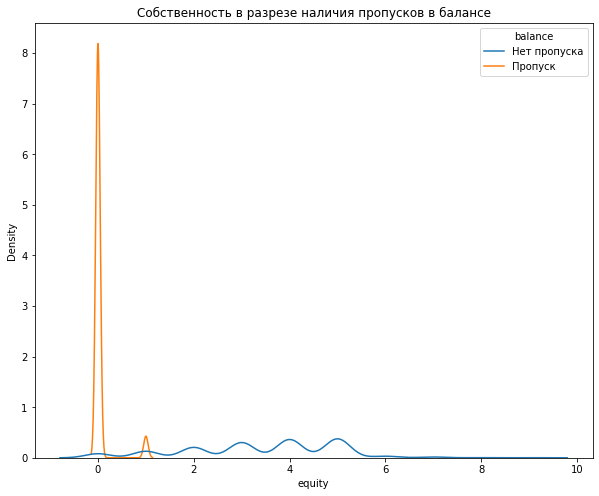

In [10]:
plt.figure(figsize=(10,8))
sns.kdeplot(data=data, 
            hue=data.balance.isna().map({True:"Пропуск",False:"Нет пропуска"}),
            x = "equity", common_norm=False)\
   .set( title="Собственность в разрезе наличия пропусков в балансе")
plt.show();

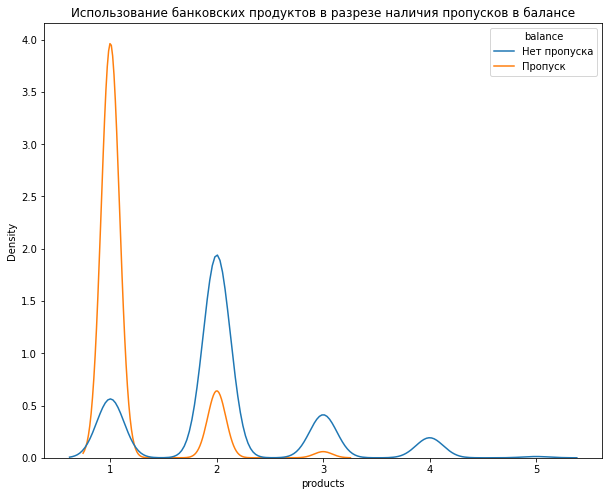

In [11]:
plt.figure(figsize=(10,8))
sns.kdeplot(data=data, 
            hue=data.balance.isna().map({True:"Пропуск",False:"Нет пропуска"}),
            x = "products", common_norm=False)\
   .set( title="Использование банковских продуктов в разрезе наличия пропусков в балансе")
plt.show();

На графиках видим, что больше всего пропусков у тех клиентов, кто не имеет значимой собственности (возможно, учтённой при кредитовании или ипотеке), а также используют небольшое количество багнковских продуктов. 

Удалять строки с пропущенными значениями в столбце "баланс" мы не можем. Во-первых, это больше 20% всего датасета. Во-вторых, на графиках видна взаимосвязь отсутсвтие баланса и двух характеристик. 
Возможно, в банке приняты определённые условия по отражению баланса от собственности и используемых продуктов.

Думаю, что пропущенные значения в графе "баланс" можно перекодировать на "0".

In [5]:
data['balance'] = data['balance'].fillna(0)

Теперь перекодируем значения в стобцах с гендером и названием города. 

Для этого применим метод get.dummies

In [14]:
data['gender_new'] = data['gender']
data['city_new'] = data['city']

In [15]:
data = pd.get_dummies(data, columns=['gender_new', 'city_new'],  dtype=int)  

Мы перекодировали категориальные характеристики в столбцах с полом и местом проживания. 

Теперь проверим данные на дубликаты.

In [6]:
data.duplicated().sum()


1

Всего один дубликат. Думаю, что можно его удалить. 

In [7]:
data = data.drop_duplicates()

Проверим столбец с id пользователей на неявные дубликаты.

In [8]:
data = data.drop_duplicates(subset='userid')

Мы провели предобработку данных. 

1) Привели названия столбцов к нижнему регистру.

2) Заполнили пропуски в столбце "баланс" значением равным нулю.

3) Перекодировали значенияв столбцах "пол" и "город",а также привели значения в них к целочисленным, чтобы можно было с ними работать в дальнейшем анализе.

4) Избавились от дубликатов. 

После всех манипуляций осталось 9926 строк в датасете, т.е., мы потеряли менее 1% от первоначальных данных, что является приемлимой величиной.

Можем переходить к этапу анализа данных.

## 2. Аналих данных

Ещё раз вызовем метод describe и составим портрет клиента по выборке.

In [20]:
data.describe()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_new_Ж,gender_new_М,city_new_Ростов,city_new_Рыбинск,city_new_Ярославль
count,9926.000000,9926.000000,9926.000000,9926.000000,9.926000e+03,9926.000000,9926.000000,9926.000000,9.926000e+03,9926.000000,9926.000000,9926.000000,9926.000000,9926.000000,9926.000000
mean,171741.484284,848.452549,42.829438,2.634596,6.402568e+05,1.875781,0.679831,0.523574,1.479038e+05,0.183357,0.498993,0.501007,0.143159,0.266069,0.590772
std,33697.332289,65.712585,12.121227,1.979382,1.779053e+06,0.800116,0.466565,0.499469,1.393674e+05,0.386978,0.500024,0.500024,0.350253,0.441923,0.491716
min,94561.000000,642.000000,18.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,2.546300e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,142715.000000,801.000000,34.000000,0.000000,6.395782e+04,1.000000,0.000000,0.000000,7.525207e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,172654.000000,853.000000,40.000000,3.000000,3.765628e+05,2.000000,1.000000,1.000000,1.197154e+05,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,201161.750000,900.000000,51.000000,4.000000,8.053314e+05,2.000000,1.000000,1.000000,1.746796e+05,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,229145.000000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


В нашей выборке почти одинаковое количество мужчин и женшин. Средний возраст клиента 43 года, он живёт в Ярославле, имеет достаочно высокий кредитный рейтинг, у него в собственности в среднем 3 значимых объекта, он использует два банковских продукта, один из которых - это кредитная карта. Его зарплата составляет 148.000. 

Посмотрим на средние значения среди ушедших и среди оставшихся клиентов.

In [21]:
data.groupby('churn').mean()


,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,gender_new_Ж,gender_new_М,city_new_Ростов,city_new_Рыбинск,city_new_Ярославль
churn,,,,,,,,,,,,,,
0,171917.272021,845.101530,43.154700,2.380952,5.311447e+05,1.762768,0.708858,0.483346,147811.174874,0.532445,0.467555,0.142117,0.272761,0.585122
1,170958.552747,863.377473,41.380769,3.764286,1.126225e+06,2.379121,0.550549,0.702747,148316.293071,0.350000,0.650000,0.147802,0.236264,0.615934


In [22]:
data.groupby('churn').max()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,gender_new_Ж,gender_new_М,city_new_Ростов,city_new_Рыбинск,city_new_Ярославль
churn,,,,,,,,,,,,,,,,
0,229145,1000.0,Ярославль,М,86,9,1.191136e+08,5,1,1,1395064.45,1,1,1,1,1
1,229058,1000.0,Ярославль,М,75,9,6.486621e+07,5,1,1,1263028.49,1,1,1,1,1


Видим, что на макисмальных значениях между отточными и лояльными есть разница в: возрасте, балансе и доходах. Максимальный возраст отточных клиентов ниже, чем лояльных. Это также праведливо для баланса и доходов.   

Для категориальных признаков посмотрим моду.

In [23]:
st.mode(data['city'])

ModeResult(mode=array(['Ярославль'], dtype=object), count=array([5864]))

Больше всего клиентов из Ярославля

In [24]:
st.mode(data['gender'])

ModeResult(mode=array(['М'], dtype=object), count=array([4973]))

Больше всего клиентов мужчин.

Посмотрим на общее количество клиентов в группах

In [25]:
data.groupby('churn').count()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,gender_new_Ж,gender_new_М,city_new_Ростов,city_new_Рыбинск,city_new_Ярославль
churn,,,,,,,,,,,,,,,,
0,8106,8106,8106,8106,8106,8106,8106,8106,8106,8106,8106,8106,8106,8106,8106,8106
1,1820,1820,1820,1820,1820,1820,1820,1820,1820,1820,1820,1820,1820,1820,1820,1820


Первый беглый взгляд позволяет сделать следующие выводы.

1) Уровень оттока в среднем составляет ~ 18%. Это достаточно высокий показатель.

2) Среди оставшихся преобладают женщины, среди ушедших - мужчины. 

3) Возраст оставшихся и ушедших примерно равен. 

4) Ушедшие клиенты в среднем обладают большей собственностью, которую банк считает значимой. ~3.8 против ~2.4 

5) Баланс ушедших клиентов выше, чем у лоялистов. 

6) Ушедшие клиенты пользуются большим количеством продуктов. 2.4 против 1.8 у оставшихся.

7) В среднем тольуо каждый второй клиент из ушедших пользовался кредитной картой. Среди оставшихся клиентов доля пользователей кредиткой составляет 70%.

8) Ушедшие клиенты за последнее время проявляли большую активность. Что это за активность нам не известно, но предположим, что она могла быть связана с выводом средств или закрытием банковских продуктов. 

9) Оцениваемая зарплата обеих групп приблизительно равна.

10) Кредитный рейтинг отточных и лояльных клиентов примерно равен.

Построим гистограммы количесвтенного распределения клиентов. Гистограммы в дальнейшем будем использоваттьь для разбиения клиентов на сегменты. 

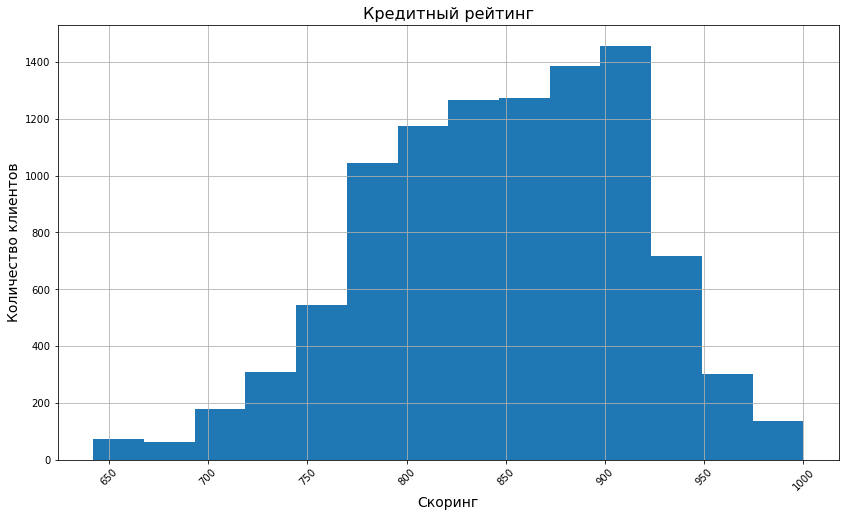

In [26]:
plt.figure(figsize=(14,8))
data['score'].hist(bins=14)
plt.xlabel('Скоринг', fontsize= 14)
plt.xticks(rotation=45)
plt.ylabel('Количество клиентов', fontsize=14)
plt.title('Кредитный рейтинг', fontsize=16)
plt.show();

Большая часть клиентов имеет кредитный рейтинг в диапазоне от 770 до 930 единиц. Средний показатель по выборке - 848 единиц.

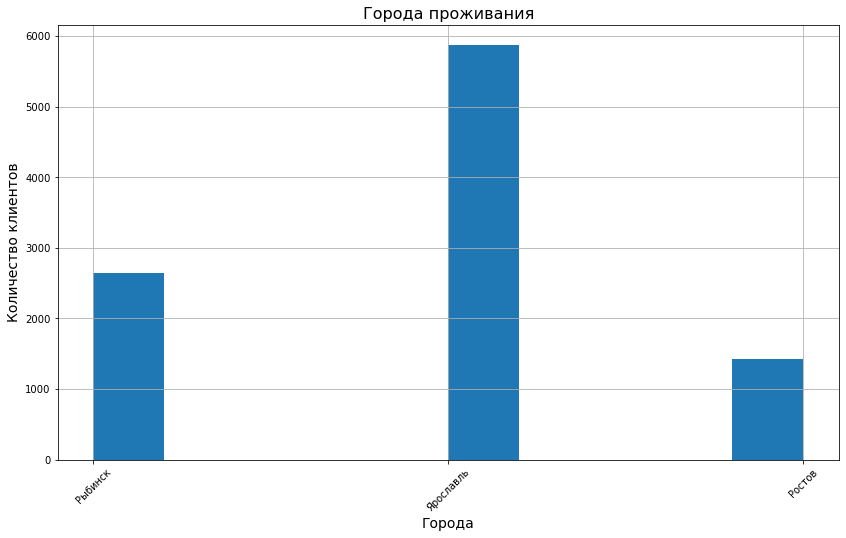

In [27]:
plt.figure(figsize=(14,8))
data['city'].hist(bins=10)
plt.xlabel('Города', fontsize= 14)
plt.xticks(rotation=45)
plt.ylabel('Количество клиентов', fontsize=14)
plt.title('Города проживания', fontsize=16)
plt.show();

В Ярославле проживает чуть больше представителей нашей выборки, чем в Рыбинске и Ростове вместе взятых.

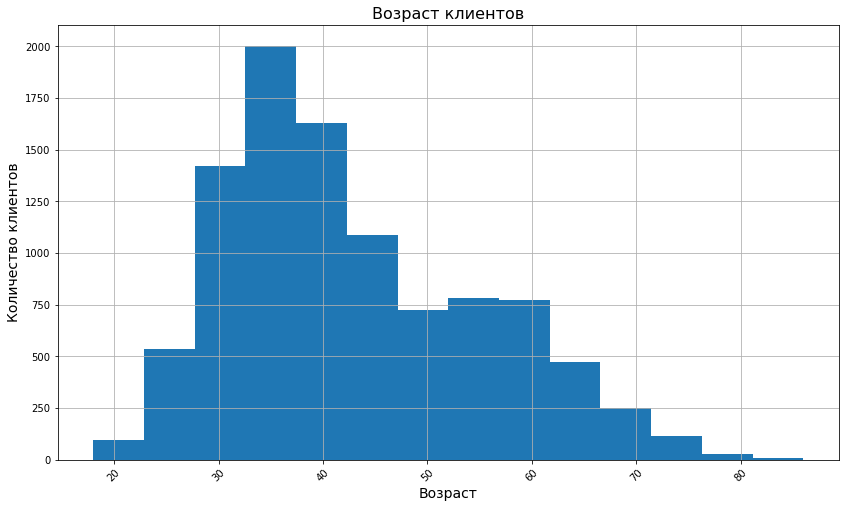

In [28]:
plt.figure(figsize=(14,8))
data['age'].hist(bins=14)
plt.xlabel('Возраст', fontsize= 14)
plt.xticks(rotation=45)
plt.ylabel('Количество клиентов', fontsize=14)
plt.title('Возраст клиентов', fontsize=16)
plt.show();

Большая часть наних клиентов - это люди в диапозоне от 28 до 45 лет. Затем большая группа от 46 до 62. Средний возраст клиентов по выборке - 42-43 года.  
На основании графика можно задать следующее возрастное деление: до 27 лет, до 40 лет, до 50 лет, до 60 лет, 61+.

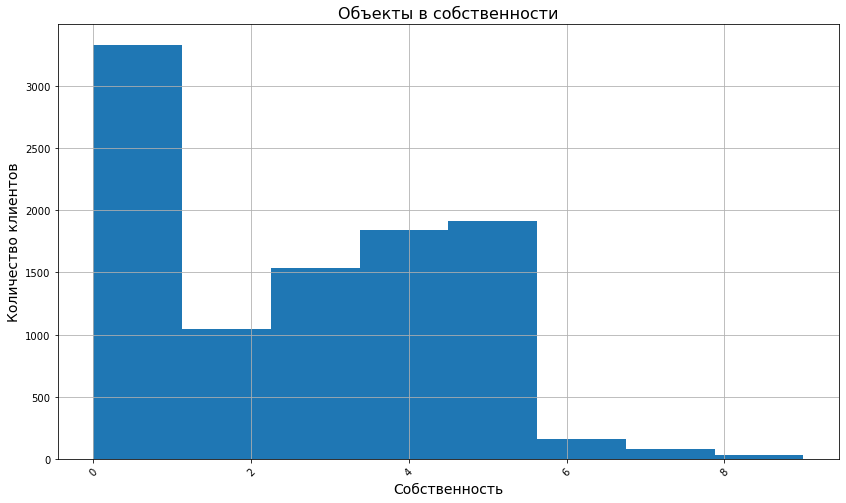

In [29]:
plt.figure(figsize=(14,8))
data['equity'].hist(bins=8)
plt.xlabel('Собственность', fontsize= 14)
plt.xticks(rotation=45)
plt.ylabel('Количество клиентов', fontsize=14)
plt.title('Объекты в собственности', fontsize=16)
plt.show();

У большей части клиентов нет значимой собственности. Но, также много клиентов 3,4 и 5 значимыми объектами. 
Можно выделить следующие сегменты: 0 объектов в собственности, 1-2 объекта, 3-4 объекта, 5 и более. Среднее количество объектов в собственности составляет 2.6. 

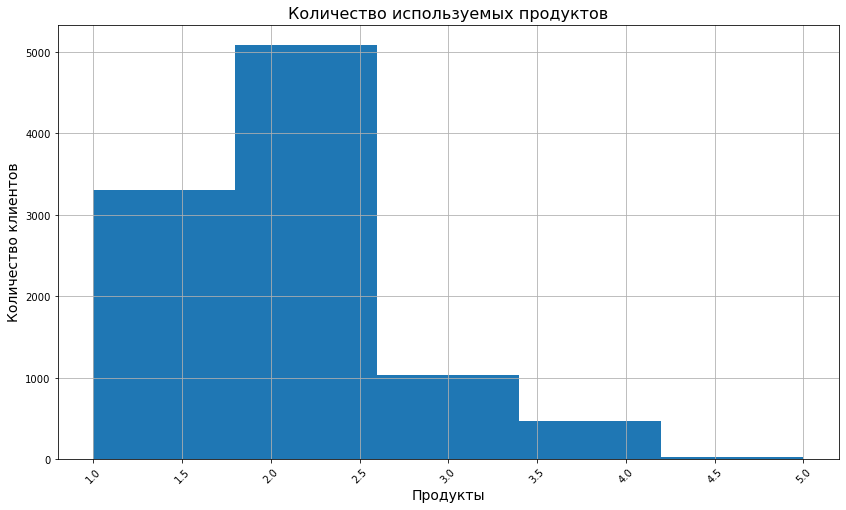

In [30]:
plt.figure(figsize=(14,8))
data['products'].hist(bins=5)
plt.xlabel('Продукты', fontsize= 14)
plt.xticks(rotation=45)
plt.ylabel('Количество клиентов', fontsize=14)
plt.title('Количество используемых продуктов', fontsize=16)
plt.show();

Большая часть наших клиентов использует от одного до трёх банковских продуктов. На графике можно выделить три сегмента: использующие до 2-х продуктов включительно, использующие 3 продукта и свыше 3-х. Среднее количество используемых банковских продуктов составляет 1.8. 

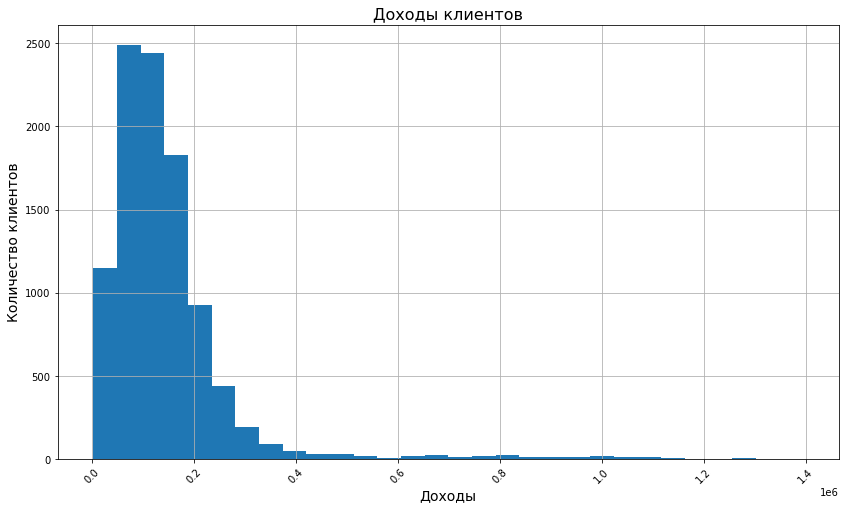

In [31]:
plt.figure(figsize=(14,8))
data['est_salary'].hist(bins=30)
plt.xlabel('Доходы', fontsize= 14)
plt.xticks(rotation=45)
plt.ylabel('Количество клиентов', fontsize=14)
plt.title('Доходы клиентов', fontsize=16)
plt.show();

На графике видим, что почти 1200 клиентов имеет доход до 50.000. 2500 клиентов имеют доход свыше 50, но меньше 100.000. Почти 2500 клиентов имеют доход свыше 100.000, но меньше 150.000. Около 2000 клиентов имеют доход до 200.000. До 1000 клиентов имеют доход до 400.000. Оставшиеся клиенты - свыше 400.000. В среднем доход клиентов составляет 148.000. 

Думаю, что эти цифры можно использовать для категоризации клиентов по группам. 

Построим графики дохода клиентов и баланса на счёте в разрезе оттока

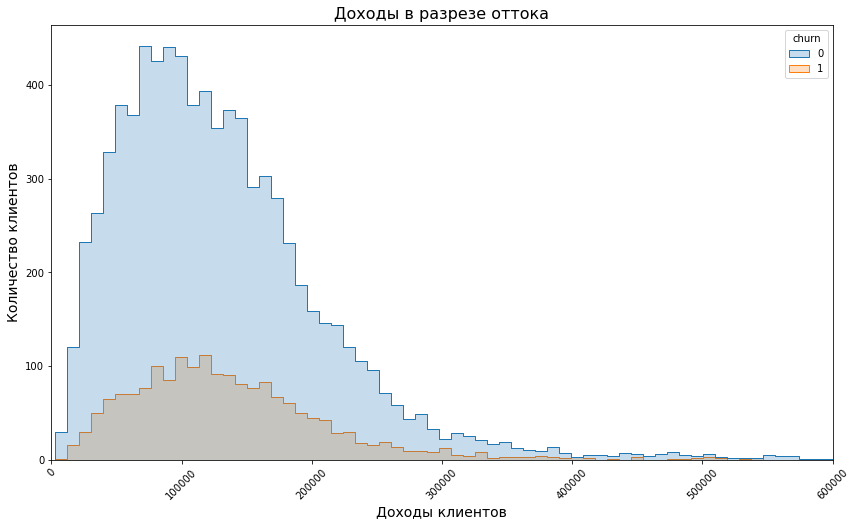

''

In [32]:
plt.figure(figsize=(14,8))
sns.histplot(data=data, x="est_salary", hue="churn", element="step")
plt.xlim([0, 6e5])
plt.xlabel('Доходы клиентов', fontsize= 14)
plt.xticks(rotation=45)
plt.ylabel('Количество клиентов', fontsize=14)
plt.title('Доходы в разрезе оттока', fontsize=16)
plt.show()
;

На графике видим, что значительная часть клиентов имеет доход ок. 150.000. Отточные клиенты, судя по графику, имеют несколько больший доход. На больших величинах дохода количество отточных по отношению к общему количеству клиентов возрастает.

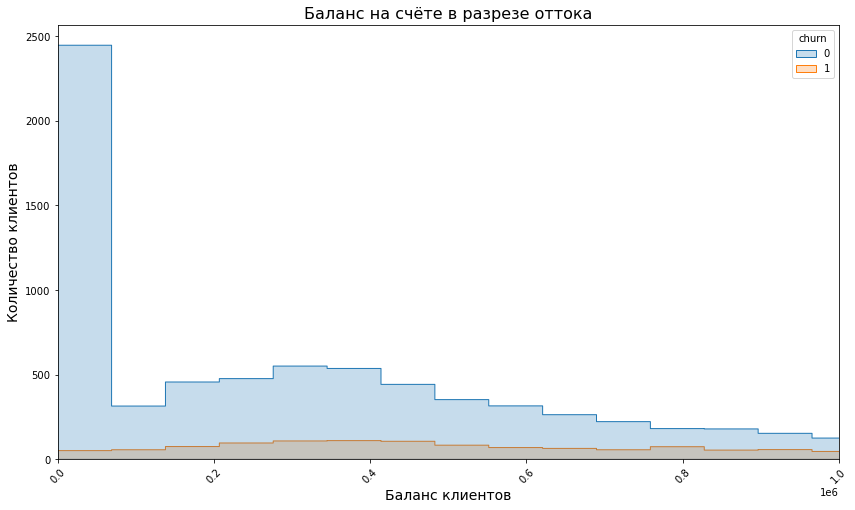

''

In [33]:
plt.figure(figsize=(14,8))
sns.histplot(data=data, x="balance", hue="churn", element="step")
plt.xlim([0, 1e6])
plt.xlabel('Баланс клиентов', fontsize= 14)
plt.xticks(rotation=45)
plt.ylabel('Количество клиентов', fontsize=14)
plt.title('Баланс на счёте в разрезе оттока', fontsize=16)
plt.show()
;

На графике видим, что по мере увеличения баланса отточность возрастает. 

Построи корреляционную матрицу, чтобы посмотреть, есть ли признаки зависимости между оттоком и различными характеристиками.

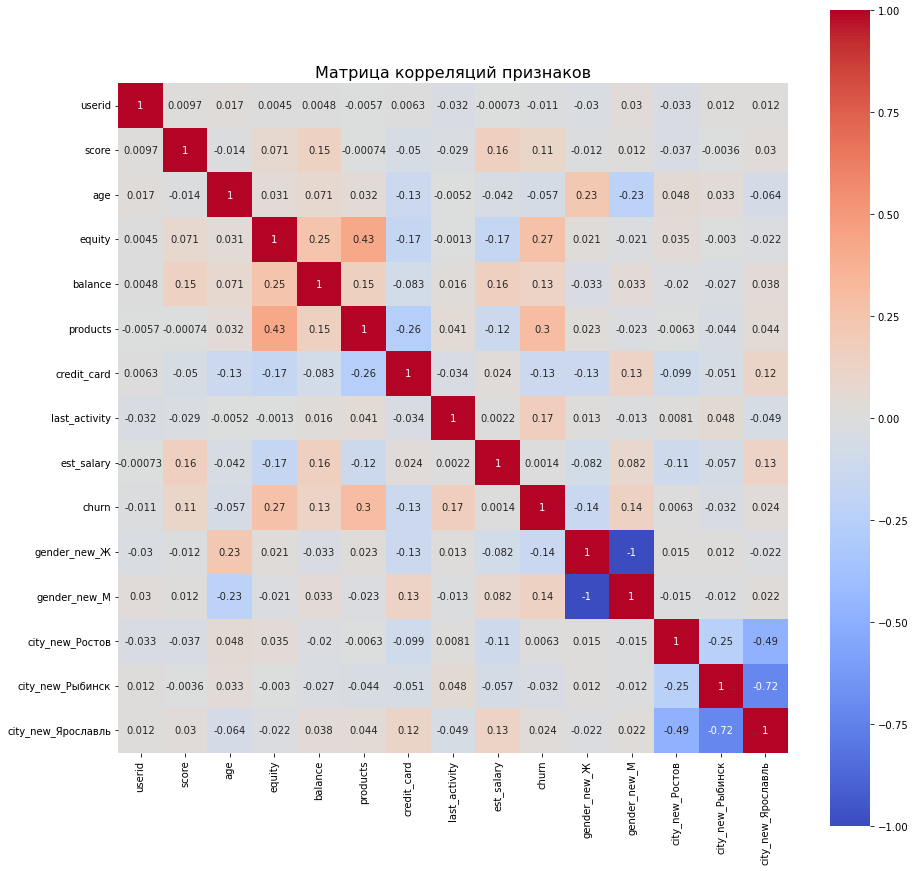

In [34]:
corr_m = data.corr() 

plt.figure(figsize = (15, 15))
sns.heatmap(data=corr_m, square= True, annot = True, cmap='coolwarm', center=0) 
plt.title('Матрица корреляций признаков', fontsize=16)
plt.show()

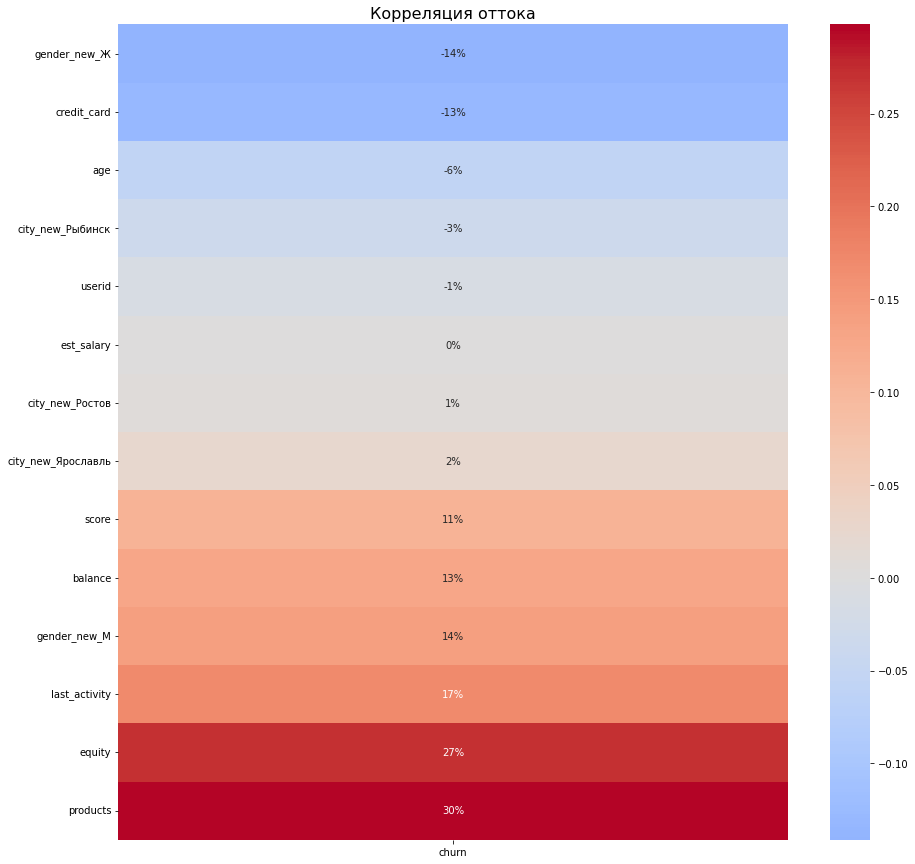

In [35]:
plt.figure(figsize = (15, 15))

sns.heatmap(
    corr_m.loc[:,['churn']].drop('churn').sort_values('churn'),
    annot=True, fmt=".0%", cmap='coolwarm', center=0
)
plt.title('Корреляция оттока', fontsize=16)
plt.show();

На корреляционный матрице видим, что существует прямая слабая зависимость между оттоком, с одной стороны, и количсетвом продуктов и собственностью, с другой.



Построим графики displot, чтобы визуализировать статистичсекие распределения

<Figure size 720x360 with 0 Axes>

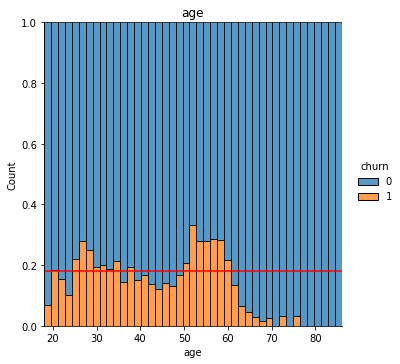

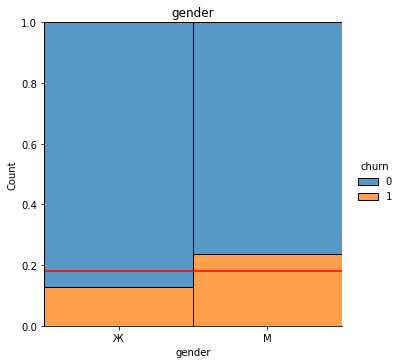

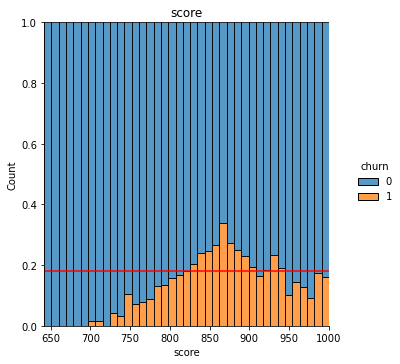

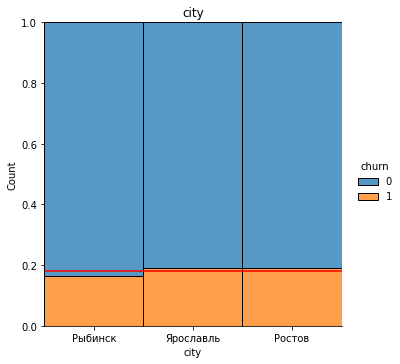

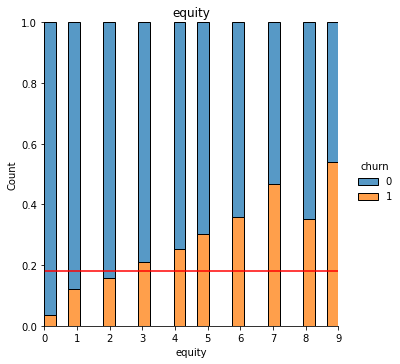

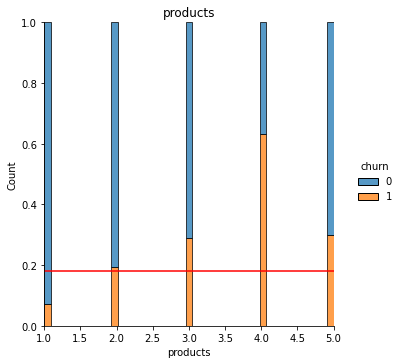

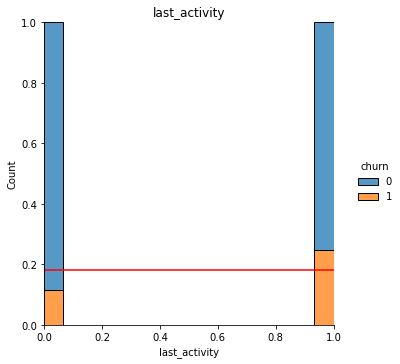

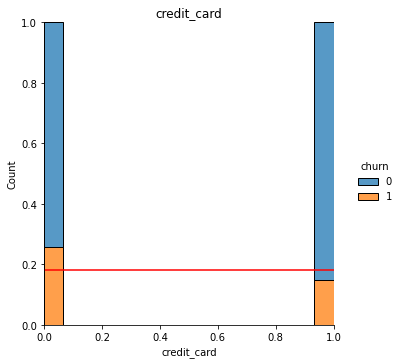

In [36]:
plt.figure(figsize=(10, 5))
for feature in ['age', 'gender', 'score', 'city', 'equity', 'products', 'last_activity', 'credit_card']:
    
    
    sns.displot(data=data, x=data[feature], hue="churn", multiple="fill")
    plt.axhline(y=0.18, color='r', linestyle='-')
    plt.title(feature)
    
plt.show();

По графикам можем сделать следующие выводы. 

1) Самый большой отток среди клиентов, чей кредитный рейтинг лежит в диапозоне от 830 до 890 единиц.

2) Уровень оттока в городах примерно равный. 

3) Уровень оттока среди мужчин заметно выше, чем среди женщин. 

4) Если рассматривать возрастное деление, то отток резко "прыгает" среди клиентов в возрастной группе от 26 до 35, а потом спадает. Потом происходит "всплеск" оттока среди клиентов, кому за 50, но меньше 60 лет. Последний "всплеск" оттока, при этом достаточно сильный, наблюдается около 80 лет. Тут сразу следует сказать, что на эту группу может в принципе приходится не так много клиентов ввиду очень высокого возраста.

5) Если посмотреть на график с количеством значимой собственности, то тут виден своего рода тренд: чем больше собственности, тем выше отток. 

6) Схожая история с количеством банковских продуктов. Тех у кого их нет - самый высокий отток, что логично. Но затем с количеством продуктов растёт и отток. Возможно, с количеством используемых банковских услуг растёт и неудовлетворённость клиентов от работы банка. Возможно, по скольку мы не знаем, что это за продукты, растёт и закредитованность клиентов и они ищут пути рефинансирования кредитов в других организациях. 

7) Среди лоялистов доля пользователей кредиток почти в два раза выше. 

8) Отточные клиенты проявляли большую активность за последнее время. 



__Портреты отточных и лояльных клиентов__

Далее будут указаны стратегические черты двух групп клиентов по характеристике оттока, которые лягут в основу портретов.

1. Отточный клиент.
Это мужчина. 41 года. Имеет ценную собственность. Имеет баланс свыше 100.000. Использвет более двух банковских продуктов. Но, кредитной картой пользуется не так часто. Активен.

2. Лояльный клиент.
Женщина. 43 года. Имеет мало ценной собственности. Баланс на счёте равен ~75.000. Использует 1-2 банковских продукта, один и которых - это кредитка. Не активна. 

Выскажем точку зрения, что лояльные клиенты имеют зарплатный проект в банке или просто офрмляют кредитку, ккоторой не пользуются, про запас или "на всякий случай". Отточные клиенты - это пользователи дорогих и высокорисковых продуктов.

## 3. Проверка гипотез. 

Для понимания природы оттока проверим гипотезу о том, что есть различия в доходах клиентов.

Н0 - средний доход лояльных и отточных клиентов НЕ ОТЛИЧАЕТСЯ. 

H1 - средний доход лояльных и отточных клиентов ОТЛИЧАЕТСЯ.

Наши выборки количественные, независимые, достаточно большие. Тест Сттюдента будет работать как при нормальном распределении, так и нет, благодаря эффекту Центральной придельной теореме (нормальные выборочные средние, полученные из выборки). Будем использовать тест Стьдента с уровень статистическо значимсоти р=0.01, т.к. количество наблюдений в наших выборках колеблется от нескольких сотен до нескольких тысяч.

In [37]:
alpha = .01 

results = st.ttest_ind(data[data['churn']==1]['est_salary'], data[data['churn']==0]['est_salary'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.8888831438540152
Не получилось отвергнуть нулевую гипотезу


Нам не удалось найти статистической значимости в зарплате двух групп клиентов. Нулеву гипотезу о равентсве мы отвергнуть не можем.

Проверим Гипотезу критерием Манна-Уитни

In [38]:
alpha = .01

results = st.mannwhitneyu(data[data['churn']==1]['est_salary'], data[data['churn']==0]['est_salary'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.00021325647213235127
Отвергаем нулевую гипотезу


Проверка дала отрицательный результат. Возможно, это связано с большей мощностью теста Манна-Уитни и, как следсвие, увеличенным шансом получить ошибку первого рода.

Проанализированные в предыдущем разделе графики, дают основания полагать, что среди отточных и лояльных клиентов есть разница в количестве используемых банковских продуктов. 

Тогда: 

Н0 - среднее количество используемых банковских продуктов лояльных и отточных клиентов НЕ ОТЛИЧАЕТСЯ. 

H1 - среднее количество используемых банковских продуктов лояльных и отточных клиентов ОТЛИЧАЕТСЯ.

Наши выборки количественные и независимые. Будем использовать тест Стьдента с уровень статистическо значимсоти р=0.01, т.к. количество наблюдений в наших выборках колеблется от нескольких сотен до нескольких тысяч.

In [39]:
alpha = .01

results = st.ttest_ind(data[data['churn']==1]['products'], data[data['churn']==0]['products'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 7.595802049899419e-203
Отвергаем нулевую гипотезу


Гипотезу о том, что уровень потребеления банковских продуктов лояльными и отточными клиентами одинаков, отвергаем.

Проверим нашу гипотезу методом z-тест.

In [40]:
alpha = .05

results = ztest(data[data['churn']==1]['products'], data[data['churn']==0]['products'], value =0)

results


(31.111058339684025, 1.7069002618347433e-212)

Полученное значение p сильно меньше, чем alpha у на есть все основания, чтобы отвергнут нулевую гипотезу.

## 4. Сегментация.

Целью сегментации будет, на основании графиков, таблиц и средних значений, сформировать достаточно компактные сегменты клиентов, где есть проблема оттока. Понять, с чем связано это поведение, и предложить решение проблемы.

Сегментировать будем клиентов будем по: полу (уже есть), по количество собвственности, по количеству используемых продуктов, по возрасту, по наличию кредитной карты, по активности (уже есть).

Разделим клиентов на возрастные группы, опираясь на средние значения и графики: до 27 лет, до 35, до 40 лет, до 50 лет, до 60 лет, 61+.

In [42]:
def age_sort(data):
    age = data['age']
    
    if age <= 27:
        return "18-27"
    if age <= 35:
        return "28-35"
    if age <= 40:
        return "36-40"
    if age <= 50:
        return "41-50"
    if age <= 60:
        return "51-60"
    else: 
        return "61+"
    
data['age_cat'] = data.apply(age_sort, axis=1)

In [44]:
data.groupby('age_cat').count()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_new_Ж,gender_new_М,city_new_Ростов,city_new_Рыбинск,city_new_Ярославль
age_cat,,,,,,,,,,,,,,,,,
18-27,631,631,631,631,631,631,631,631,631,631,631,631,631,631,631,631,631
28-35,2614,2614,2614,2614,2614,2614,2614,2614,2614,2614,2614,2614,2614,2614,2614,2614,2614
36-40,1826,1826,1826,1826,1826,1826,1826,1826,1826,1826,1826,1826,1826,1826,1826,1826,1826
41-50,2254,2254,2254,2254,2254,2254,2254,2254,2254,2254,2254,2254,2254,2254,2254,2254,2254
51-60,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577
61+,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024


In [45]:
pd.crosstab(data['age_cat'], data['churn'], normalize='index').sort_values(by=1, ascending=False)

churn,0,1
age_cat,,
51-60,0.725428,0.274572
18-27,0.773376,0.226624
28-35,0.789594,0.210406
36-40,0.832968,0.167032
41-50,0.853594,0.146406
61+,0.942383,0.057617


In [46]:
data.groupby('age_cat').mean().style.format("{:_.2f}")

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_new_Ж,gender_new_М,city_new_Ростов,city_new_Рыбинск,city_new_Ярославль
age_cat,,,,,,,,,,,,,,,
18-27,171_368.18,851.55,24.93,2.34,223_599.91,1.86,0.76,0.60,88_460.45,0.23,0.34,0.66,0.16,0.26,0.58
28-35,169_947.18,851.84,31.98,2.66,560_301.12,1.86,0.73,0.53,139_794.37,0.21,0.43,0.57,0.12,0.25,0.64
36-40,173_210.98,845.34,37.87,2.62,648_363.31,1.88,0.71,0.51,179_746.63,0.17,0.45,0.55,0.14,0.26,0.60
41-50,171_740.60,846.45,44.92,2.59,646_003.88,1.84,0.69,0.48,180_833.99,0.15,0.48,0.52,0.14,0.26,0.60
51-60,173_272.24,847.04,55.45,2.73,803_190.42,1.93,0.60,0.52,135_561.94,0.27,0.57,0.43,0.16,0.31,0.53
61+,171_576.03,850.04,66.36,2.73,823_080.60,1.92,0.56,0.56,94_974.28,0.06,0.80,0.20,0.18,0.28,0.54


Видим, что отток выше, чем в среднем по выборке (18%) в трёх возрастных группах - 18-27 лет, 28-35 и 51-60 лет. Суммарно клиенты  этих возрастных групп - это 55% выборки. Так же видим, что в этих группах преобладают мужчины. 

In [47]:
data.groupby(['age_cat', 'gender']).mean().style.format("{:_.2f}")

Мужчины боле склоны к оттоку во всех возрастных группах. Но, в группах указанных выше, в отток уходит каждый 4-ый или даже каждый 3-й клиент. 

In [48]:
data.groupby(['age_cat', 'gender']).count()

userid  score  city   age  equity  balance  products  \
age_cat gender                                                         
18-27   Ж          212    212   212   212     212      212       212   
        М          419    419   419   419     419      419       419   
28-35   Ж         1128   1128  1128  1128    1128     1128      1128   
        М         1486   1486  1486  1486    1486     1486      1486   
36-40   Ж          814    814   814   814     814      814       814   
        М         1012   1012  1012  1012    1012     1012      1012   
41-50   Ж         1080   1080  1080  1080    1080     1080      1080   
        М         1174   1174  1174  1174    1174     1174      1174   
51-60   Ж          897    897   897   897     897      897       897   
        М          680    680   680   680     680      680       680   
61+     Ж          822    822   822   822     822      822       822   
        М          202    202   202   202     202      202       202   

                credit_card  last_activity  est_salary  churn  gender_new_Ж  \
age_cat gender                                                                
18-27   Ж               212            212         212    212           212   
        М               419            419         419    419           419   
28-35   Ж              1128           1128        1128   1128          1128   
        М              1486           1486        1486   1486          1486   
36-40   Ж               814            814         814    814           814   
        М              1012           1012        1012   1012          1012   
41-50   Ж              1080           1080        1080   1080          1080   
        М              1174           1174        1174   1174          1174   
51-60   Ж               897            897         897    897           897   
        М               680            680         680    680           680   
61+     Ж               822            822         822    822           822   
        М               202            202         202    202           202   

                gender_new_М  city_new_Ростов  city_new_Рыбинск  \
age_cat gender                                                    
18-27   Ж                212              212               212   
        М                419              419               419   
28-35   Ж               1128             1128              1128   
        М               1486             1486              1486   
36-40   Ж                814              814               814   
        М               1012             1012              1012   
41-50   Ж               1080             1080              1080   
        М               1174             1174              1174   
51-60   Ж                897              897               897   
        М                680              680               680   
61+     Ж                822              822               822   
        М                202              202               202   

                city_new_Ярославль  
age_cat gender                      
18-27   Ж                      212  
        М                      419  
28-35   Ж                     1128  
        М                     1486  
36-40   Ж                      814  
        М                     1012  
41-50   Ж                     1080  
        М                     1174  
51-60   Ж                      897  
        М                      680  
61+     Ж                      822  
        М                      202

Далее разобьём клиентов по пользованию продуктами. 


In [49]:
def product_sort(data):
    product = data['products']
    
    if product <= 1:
        return "Неофиты"
    if product <= 2:
        return "Адепты"
    else: 
        return "Фанаты"
    
data['prod_cat'] = data.apply(product_sort, axis=1)

In [50]:
data.groupby('prod_cat').count()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_new_Ж,gender_new_М,city_new_Ростов,city_new_Рыбинск,city_new_Ярославль,age_cat
prod_cat,,,,,,,,,,,,,,,,,,
Адепты,5081,5081,5081,5081,5081,5081,5081,5081,5081,5081,5081,5081,5081,5081,5081,5081,5081,5081
Неофиты,3306,3306,3306,3306,3306,3306,3306,3306,3306,3306,3306,3306,3306,3306,3306,3306,3306,3306
Фанаты,1539,1539,1539,1539,1539,1539,1539,1539,1539,1539,1539,1539,1539,1539,1539,1539,1539,1539


In [51]:
pd.crosstab(data['prod_cat'], data['churn'], normalize='index').sort_values(by=1, ascending=False)

churn,0,1
prod_cat,,
Фанаты,0.605588,0.394412
Адепты,0.807518,0.192482
Неофиты,0.928917,0.071083


In [52]:
data.groupby('prod_cat').mean().style.format("{:_.2f}")

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_new_Ж,gender_new_М,city_new_Ростов,city_new_Рыбинск,city_new_Ярославль
prod_cat,,,,,,,,,,,,,,,
Адепты,171_438.71,844.55,43.16,3.15,765_753.17,2.00,0.63,0.52,130_772.91,0.19,0.52,0.48,0.16,0.30,0.54
Неофиты,172_048.62,853.65,41.84,1.33,256_071.26,1.00,0.87,0.53,180_616.23,0.07,0.46,0.54,0.13,0.26,0.61
Фанаты,172_081.32,850.16,43.86,3.72,1_051_218.47,3.35,0.45,0.54,134_190.12,0.39,0.51,0.49,0.11,0.17,0.72


In [53]:
data.groupby(['prod_cat', 'gender']).mean().style.format("{:_.2f}")

Видим, что и тут наибольший отток среди мужчин, которые используют свыше трёх продуктов - почти каждый второй. Но и отток среди женщин в этой группе также очень высокий - 29%. Отметим, что в группе "неофиты", где наименьшее пользование банковскими продуктами наименьший отток (9% для мужчин и 4% для женщин). В группах "адепты" и "фанаты" - высокое среднее значение значимой собственности - порядка 3-х объектов.

Последняя категоризация каснётся количества ценной собственности. 

In [54]:
def equity_sort(data):
    equity = data['equity']
    
    if equity == 0:
        return "Нет собственности"
    if equity <= 2:
        return "1-2 объекта"
    if equity <= 3:
        return "3 объекта"
    else: 
        return "4 и больше"
    
data['equity_cat'] = data.apply(equity_sort, axis=1)

In [55]:
data.groupby('equity_cat').count()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_new_Ж,gender_new_М,city_new_Ростов,city_new_Рыбинск,city_new_Ярославль,age_cat,prod_cat
equity_cat,,,,,,,,,,,,,,,,,,,
1-2 объекта,1818,1818,1818,1818,1818,1818,1818,1818,1818,1818,1818,1818,1818,1818,1818,1818,1818,1818,1818
3 объекта,1532,1532,1532,1532,1532,1532,1532,1532,1532,1532,1532,1532,1532,1532,1532,1532,1532,1532,1532
4 и больше,4022,4022,4022,4022,4022,4022,4022,4022,4022,4022,4022,4022,4022,4022,4022,4022,4022,4022,4022
Нет собственности,2554,2554,2554,2554,2554,2554,2554,2554,2554,2554,2554,2554,2554,2554,2554,2554,2554,2554,2554


In [56]:
pd.crosstab(data['equity_cat'], data['churn'], normalize='index').sort_values(by=1, ascending=False)

churn,0,1
equity_cat,,
4 и больше,0.714073,0.285927
3 объекта,0.790470,0.209530
1-2 объекта,0.857536,0.142464
Нет собственности,0.964761,0.035239


In [57]:
data.groupby(['equity_cat', 'gender']).mean().style.format("{:_.2f}")

Клиенты, у которых нет значимой собственности, почти не уходят. А те, у кого 3 или больше объектов уходят в целом чаще, чем в среднем по выборке.

Далее будем определять отточные сегменты, рассматривая набор из стратегических перемнных и значений, которые они могут принимать.

In [58]:
data.query('gender == "М"  & prod_cat == "Фанаты" & equity > 2').count()

userid                618
score                 618
city                  618
gender                618
age                   618
equity                618
balance               618
products              618
credit_card           618
last_activity         618
est_salary            618
churn                 618
gender_new_Ж          618
gender_new_М          618
city_new_Ростов       618
city_new_Рыбинск      618
city_new_Ярославль    618
age_cat               618
prod_cat              618
equity_cat            618
dtype: int64

In [59]:
data.query('gender == "М"  & prod_cat == "Фанаты" & equity > 2')['churn'].mean()

0.5372168284789643

1) Мужчины, у которых 3 и более банковских продукта и 3 значимых объекта в собственности. Достаточно большой сегмент в 6%, из которого каждый второй клиент отточный. 

In [60]:
data.query('gender == "М" & age_cat == "51-60"')['churn'].mean()

0.34705882352941175

2) Мужчины возраста 51-60 лет. Чуть менее 7% от общего количества клиентов. Уходит каждый третий. 

In [61]:
data.query('last_activity == 1 & equity_cat == "4 и больше"')['churn'].count()


2133

In [62]:
data.query('last_activity == 1 & equity_cat == "4 и больше"')['churn'].mean()

0.39662447257383965

3) Активные клиенты, имеющие 4 и больше значимых объекта имущества, составляют 21% от выборки и уходят с вероятностью 40% 

In [63]:
data.query('credit_card == 0 & prod_cat == "Фанаты"')['churn'].count()

839

4) Клиенты, у которых нет кредитной карты, но от трёх банковских продуктов - это 8,5% от общего числа клиентов. Здесь уровень оттока составляет 40%.  

In [64]:
data.query('age_cat == "28-35" & last_activity == 1 & credit_card == 0')['churn'].mean()

0.46153846153846156

5) Почти 5% клиентов - это молодёжь в возрасте 28-35 лет, активные, но не имеющие кредитной карты. В такой группе уходит почти каждый второй клиент.

### Дерево решений.

В качестве опционального решения попробуем построить классификацию на основе дерева решений.

Наше дерево будет перебирать характеристики, выбирая не ограниченное количество наилучших. Глубину дерева зададим в четыре узла. Но ограничм минимальный размер листа (100 значений), чтобы выборка не получилась очень дробной. 

In [65]:
X = data.drop(['churn', 'age_cat', 'prod_cat', 'equity_cat', 'city', 'gender'], axis = 1)
y = data['churn']

model = DecisionTreeClassifier(criterion = "entropy", random_state = 10, max_depth = 4, min_samples_leaf=100, class_weight="balanced")
model.fit(X,y)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4, min_samples_leaf=100, random_state=10)

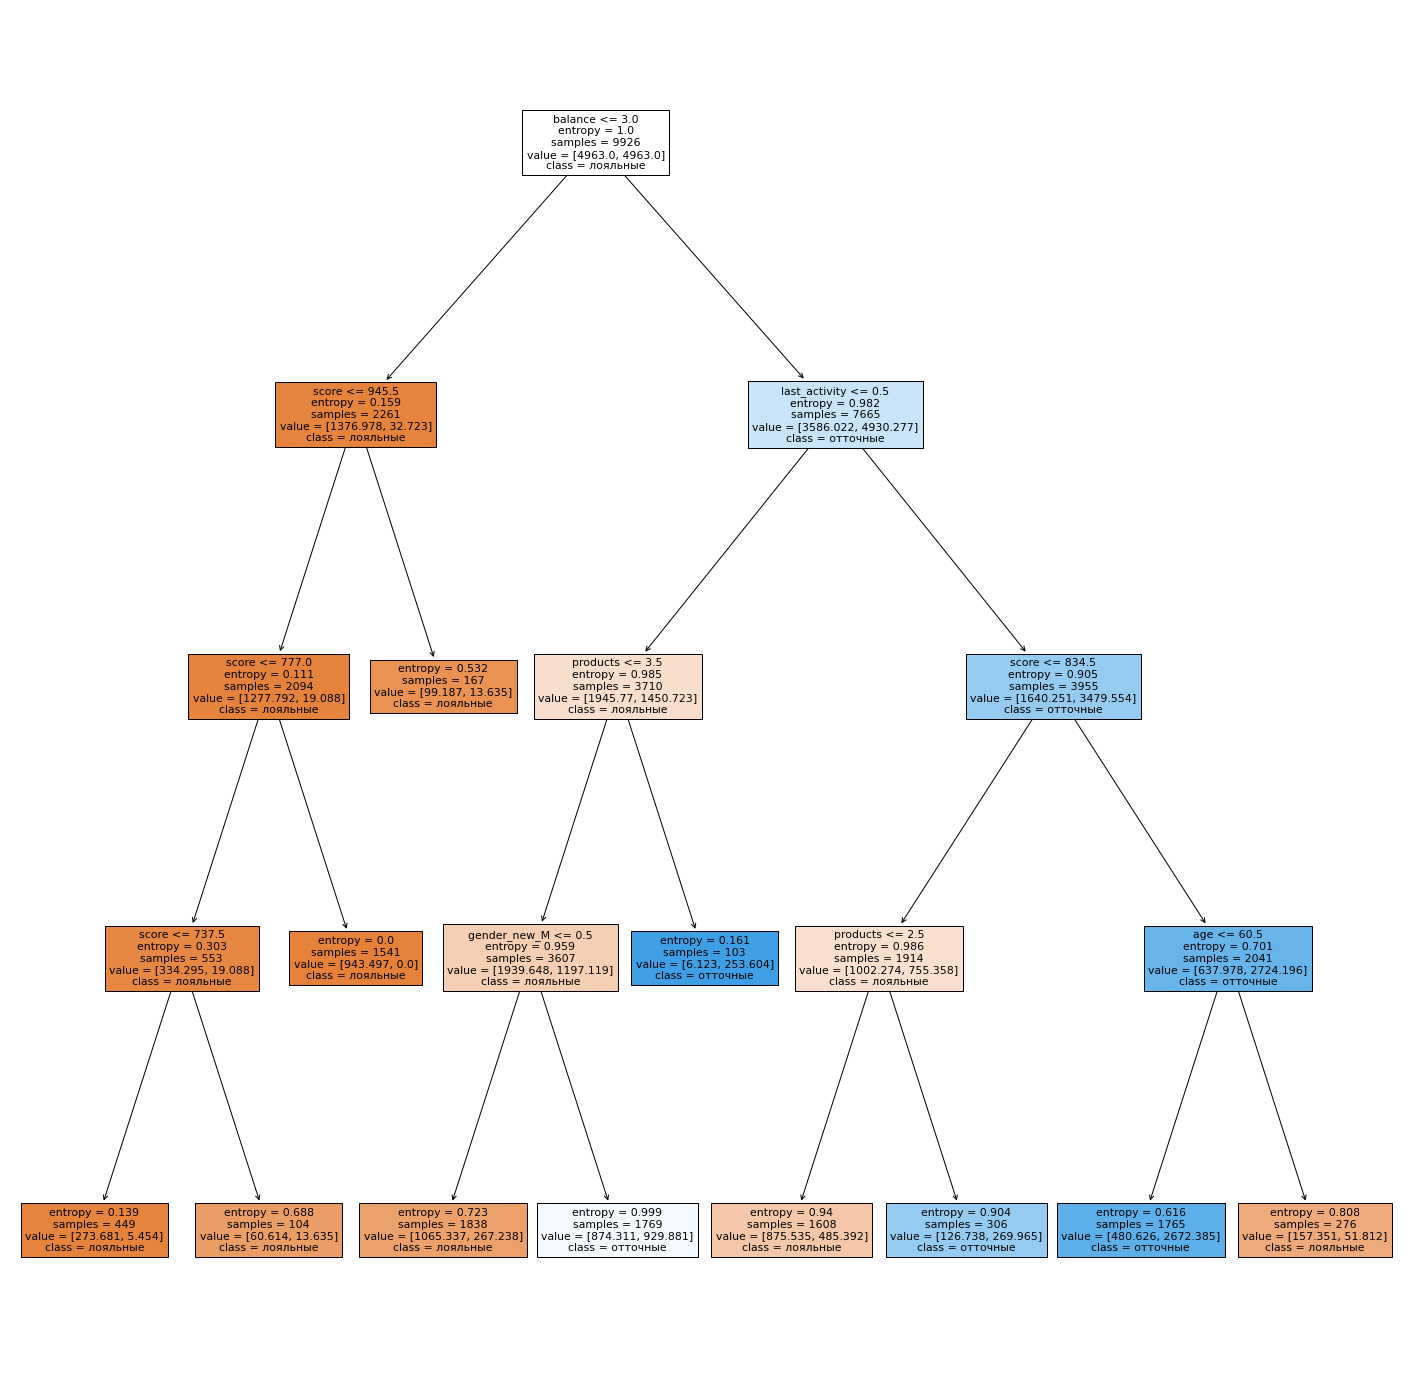

In [66]:
cn = ['лояльные', 'отточные']
plt.figure(figsize = (25, 25))
tree.plot_tree(model, feature_names = list(X.columns), class_names = cn, filled = True);

Во-первых, у дерева получилося портрет лояльного клиента. У него почти нулевой баланс на счёте. При этом это клиенты как с достаочно высоким уровнем кредитного рейтинга, так и нет. 

Во-вторых, лояльные клиенты проявляют низкую активность. Об этом свидетельствует узел второй глубины. 

В-третьих, проблемным является сегмент мужчин с низкой активностью и количесвтом банковских продуктов менее 3,5. 

В-четвёртых, в группе активных клиентов с кредитным рейтингом выше 834.5 отток составляет почти 50%. Этот сегмент составляет 17% от общего числа клиентов банка.

в-пятых, для отточны клиентов характерны средний и высокий баланс на счёте, а также количество используемых продуктов от 4-х.

В чём-то дерево решений подтвердило наши визуальные изыскания, а в чём-то дополнило. 

## 5. Выводы.

И так, нами был проведён анализ отточности клиентов банка.

1) __Мы провели предобработку данных:__ 

- привели названия столбцов к нижнему регистру;

- заполнили пропуски в столбце "баланс" значением равным нулю;

- перекодировали значенияв столбцах "пол" и "город",а также привели значения в них к целочисленным, чтобы можно было с ними работать в дальнейшем анализе;

- избавились от дубликатов. 

2) __Мы провели анализ данных:__ 

- проанализировали средние значения различных характеристик в группах с оттоком и без него;

- построили гистограммы для оценки распределения различных характеристик клиентов;

- построили корреляционную матрицу и определили, какие признаки влияют на отток. Визуализировали матрицу хитмепом;

- визуализировали данные из датафрейма, чтобы выявить зависимости между различными признаками и целевым показателем. 

__Выяснили, что:__

а) уровень оттока в среднем составляет ~ 18%; 

б) среди лояльных клиентов преобладают женщины, среди ушедших - мужчины;

в) возраст оставшихся и ушедших примерно равен;

г) ушедшие клиенты в среднем обладают большей собственностью, которую банк считает значимой. ~3.8 против ~2.4; 

д) баланс на счёте ушедших клиентов выше, чем у лоялистов; 

е) ушедшие клиенты пользуются большим количеством продуктов. 2.4 против 1.8 у оставшихся;

ж) в среднем тольуо каждый второй клиент из ушедших пользовался кредитной картой. Среди оставшихся клиентов доля пользователей кредиткой составляет 70%;

з) ушедшие клиенты за последнее время проявляли большую активность. Что это за активность нам не известно, но предположим, что она могла быть связана с выводом средств или закрытием банковских продуктов; 

и) оцениваемая зарплата обеих групп приблизительно равна;

к) кредитный рейтинг отточных и лояльных клиентов примерно равен;


- Составили __портреты__, на основании стратегических черт, лояльных и отточных елинтов.

    1. __Отточный клиент.__
Это мужчина. 41 года. Имеет много собственности - свыше 3-х объектов (высокую закредитованность?). Имеет баланс свыше 100.000. Использвет более двух банковских продуктов. Но, кредитной картой пользуется не так часто. Активен.

    2. __Лояльный клиент.__
Женщина. 43 года. Имеет до двух объектов в собственности. Баланс на счёте равен ~75.000. Использует 1-2 банковских продукта, один и которых - это кредитка. Не активна. 

3) __Проверили гипотезу о:__

- разнице в среднем доходе лояльных и отточных клиентов. Выяснили, что статистически значимой разницы нет;

- разнице в среднем количестве используемых банковских продуктах лояльными и отточными пользователями. Выяснили, что статистически значимая разница есть.

4) __Провели сегментацию клиентов:__ 

- на основании стратегических черт - пол, количество собвственности, количество используемых продуктов, возраст, наличие кредитной карты, активность - мы выявили оттчоные сегменты. 

__Отточные сегменты__

1) Мужчины, у которых 3 и более банковских продукта и 3 значимых объекта в собственности. Достаточно большой сегмент в 6%, из которого каждый второй клиент отточный. 

2) Мужчины возраста 51-60 лет. Чуть менее 7% от общего количества клиентов. Уходит каждый третий. 

3) Активные клиенты, имеющие 4 и больше значимых объекта имущества, составляют 21% от выборки и уходят с вероятностью 40%.

4) Клиенты, у которых нет кредитной карты, но от трёх банковских продуктов - это 8,5% от общего числа клиентов. Здесь уровень оттока составляет 40%.

5) Почти 5% клиентов - это молодёжь в возрасте 28-35 лет, активные, но не имеющие кредитной карты. В такой группе уходит почти каждый второй клиент.

Кроме того, было использован алгоритм Дерева решений, а результаты визуализированы. Это позволило добавить установить ещё несколько отточных сегментов:

- это группа активных клиентов с кредитным рейтингом выше 834.5 отток составляет почти 50%. Этот сегмент составляет 17% от общего числа клиентов банка;

- для отточны клиентов характерны средний и высокий баланс на счёте, а также количество используемых продуктов от 4-х.

## Рекомендации.

Принимая во внимание, что отдел маркетинга в силу ресурсов, не может озватить большие группы клиентов, были составлены достаточно небольшие сегменты, уровень оттока в которых является значимым. 

Во-первых, наличие кредитной картой является фактором удержания клиентов. Карта на интересных условиях способна "привязать" клиента к банку. Хотя, нужно отметить, что значительная часть таких клиентов большой активности не проявляет. В сегментах 28-35 и 51-60 лет, где высокий отток, нужно предлагть кредитки на выгодных условиях: кэшбэк (лучше всего, коль речь про мужчин, с заправок, например), увеличенный процентный период, процент на остаток (что особенно интересно отточным клиентам, но с большим балансом на счёте).  

Во-вторых, достаточно велико количество отточных клиентов в сегменте с большим количеством собственности и использованием банковских продуктов. И при этом низким уровнем владением кредитной картой. Эти клиенты пришли в банк за выгодным кредитом, получили его, а потом или выплатили, или рефинансировались в другой банк. Здесь хорошим решением может быть "пакетное" предложение (объединить несколько продуктов в один) с пониженной, чем у конкурентов ставкой. 

В-третьих, в качестве опционального решения, расширять круг зарплатных партнёров. По представленной выборке трудно понять где здесь зарплатный проект, а где нет. Но, на практике, отток может быть связан со сменой клиентом места работы.

В-четвёртых, в качетсве предположения, отток среди мужчин 51-60 может быть связан с выходом на пенсию (военные, силовики, чиновники) и переходом на социальные карты ("Мир"). Можно предложить им перевод пенсии в банк, в духе: "Переведи пенсию, получишь 1000 рублей на счёт", - как это сделал один изветсный федеральный банк.

В-пятых, отток среди мужчин 51-60 лет может быть свящан с невозможностью, в силу возраста, получить кредит в нашем банке и поиск кредитных учереждений, которые готовы такую услугу предоставить.

In [9]:
# data.to_csv('C:/Users/Пользователь/Downloads/data_banki.csv')